In [2]:
import pandas as pd

df = pd.read_excel('doc_comment_summary.xlsx', header=None)
df.columns = ['sentence', 'rating']

In [8]:
len(df['sentence'])

26873

In [11]:
df['rating'].nunique()

17

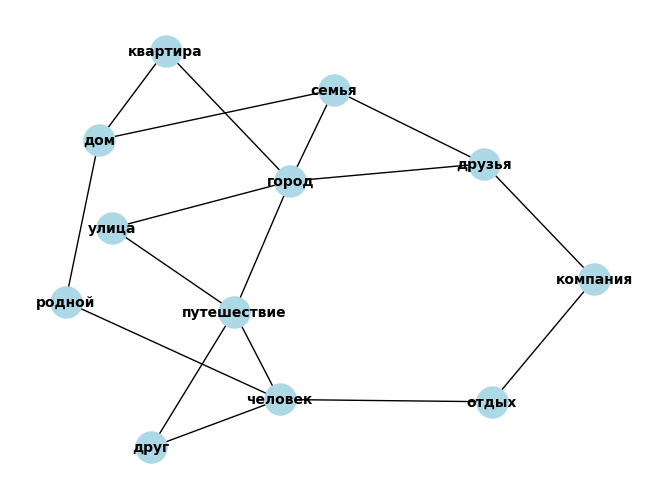

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Создаем пустой граф
G = nx.Graph()

# Создаем список пар слов с ассоциациями
pairs = [
    ("дом", "родной"),
    ("родной", "человек"),
    ("человек", "друг"),
    ("друг", "путешествие"),
    ("дом", "семья"),
    ("семья", "друзья"),
    ("друзья", "компания"),
    ("компания", "отдых"),
    ("дом", "квартира"),
    ("квартира", "город"),
    ("город", "улица"),
    ("человек", "путешествие"),
    ("человек", "отдых"),
    ("путешествие", "город"),
    ("путешествие", "улица"),
    ("город", "семья"),
    ("город", "друзья"),
    ("семья", "друзья"),
]

# Добавляем вершины (слова)
all_words = set()
for pair in pairs:
    all_words.add(pair[0])
    all_words.add(pair[1])

G.add_nodes_from(all_words)

# Добавляем ребра между словами
G.add_edges_from(pairs)

# Удаляем выбранные слова
words_to_remove = ["гараж", "машина", "сад", "цветы", "пчелы"]
G.remove_nodes_from(words_to_remove)

# Располагаем вершины красиво с помощью Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G)

# Рисуем граф
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold')
plt.show()


In [3]:
data = df[pd.to_numeric(df['rating'], errors='coerce').notna()]
data = data.loc[(data['rating'] >= -2) & (data['rating'] <= 2)]
data['rating'].unique()

array([-1, 0, 1, -2, 2], dtype=object)

In [4]:
len(data)

26827

In [8]:
import matplotlib.pyplot as plt

ratins = data['rating']
value_counts = ratins.value_counts()

value_counts

rating
0     13930
-1     9203
1      1795
-2     1534
2       365
Name: count, dtype: int64

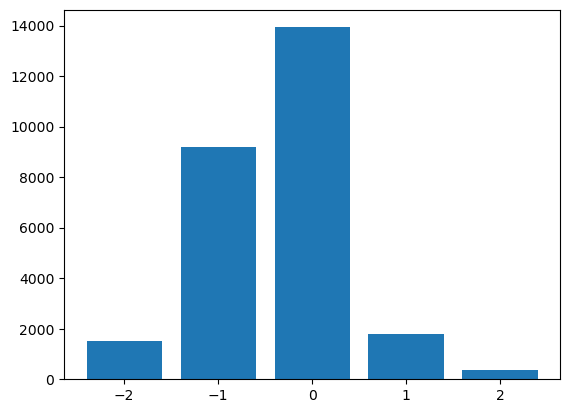

In [9]:
labels = [-2, -1, 0, 1, 2]
counts = [1534, 9203, 13930, 1795, 365]

plt.bar(labels, counts)
plt.show()